# Assignment 3: Clustering California Housing with K-means

### CS 6316 Machine Learning - Department of Computer Science - University of Virginia
"Tonight, more than 130,000 Californians will go to sleep homeless. That’s enough to fill Dodger Stadium, AT&T Park and Petco Park. The biggest culprit is rising housing costs. From 2000 to 2014, median rent in California increased by more than one-third, while real incomes for renters fell by 7 percent. Today, 1.5 million Californians spend more than half their income on housing. This crisis threatens not just low-income families but our entire economy, driving businesses to relocate to states in which their employees can afford to live. - **Business Insider, Sep 2018.**"

![Half of the homes in San Franciso is now one million or above](https://amp.businessinsider.com/images/573de0b88d3eaea27198a55d-960-480.jpg)

In this assignment, you will attempt to cluster the California Housing by implementing and analyzing the k-means algorithm to the data. K-Means is one of the most popular clustering algorithms. K-means stores k-centroids that it uses to define clusters. A point is considered to be in a particular cluster if it is closer to that cluster's centroid than any other centroid. For references, you may refer to my lecture 9 or Chapter 2 of the textbook if you need additional sample codes to help with your assignment. For deliverables, you must write code in Python and submit this Jupyter Notebook file (.ipynb) to earn a total of 100 pts. You will gain points depending on how you perform in the following sections.


---
## 1. PRE-PROCESSING THE DATA (10 pts)

Download the California Housing dataset from the below link. This dataset includes statistics about the median income, median age, average number of rooms per person, average number of persons in a household etc. The statistics were gathered per geographical block.

**Data Acquiring:** Download the dataset from https://www.kaggle.com/camnugent/california-housing-prices

**Data Discovery, Visualization, and Cleaning:** Fortunately, this step have been given to you (for free) from chapter 2. However, you should review them and write the code necessary for the purposes of this assignment. 

In [1]:
# You might want to use the following package
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix # optional
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd
# Your code goes here for this section.
# X_train = [];
# X_test = [];
housing = pd.read_csv('housing.csv')
print(housing.info())
housing["ocean_proximity"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [2]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
#housing.hist(bins=50, figsize=(20,15))
#plt.show()

In [4]:
from sklearn import preprocessing
le = LabelEncoder()
housing['ocean_proximity']= le.fit_transform(housing['ocean_proximity'])
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


housing_num = housing.drop('ocean_proximity', axis=1)
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
        ('imputer', Imputer(strategy="median")),
    ])


housing[['longitude', 'latitude', 'housing_median_age','total_rooms', 'total_bedrooms','population','households','median_income','median_house_value']] = num_pipeline.fit_transform(housing[['longitude', 'latitude', 'housing_median_age','total_rooms', 'total_bedrooms','population','households','median_income','median_house_value']])
housing.head()



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [6]:
scaler = StandardScaler()
housing[['longitude', 'latitude', 'housing_median_age','total_rooms', 'total_bedrooms','population','households','median_income','median_house_value']] = scaler.fit_transform(housing[['longitude', 'latitude', 'housing_median_age','total_rooms', 'total_bedrooms','population','households','median_income','median_house_value']])
housing.head()

data = housing.values#convert into numpy array

#data = data[:,:2]
print(data.shape)

(20640, 10)


- - -
## 2. IMPLEMENTING K-MEANS (40 pts)

You must implement your own version of K-Means Algorithm. Input a cluster count K and M data points each with its own vector of N features, along with the choice of a distance measure; then:

1. Initialize K centroids. In our case, a centroid is just the average of all data in a cluster, and it can be represented just like a normal cluster.
2. Assign each data point to the cluster that has the closest centroid base on a **distance measure**.
3. After all data points have been assigned to clusters, recalculate the centroids for each cluster (as averages of all points in the cluster).
4. Repeat the data assignments and centroid calculations until no change in gene assignment occurs between iterations.

**Distance Measures:** Your implementation must have an option of using two distance measures for clustering: 
- Euclidean distance: Euclidean distance measures differences in the absolute levels of instances.
$d(\mathbf{x},\mathbf{y}) = \sqrt[\leftroot{2}\uproot{2}2]{\sum\limits_{i=1}^n|x_i - y_i|^2}$
- Spearson rank correlation: Spearson rank correlation uses ranks in place of absolute values, which makes it less sensitive to outliers (extremely high or low values) in the data.
$d(\mathbf{x},\mathbf{y}) = \frac{\sum_i (x^{(i)} - \bar{x})(y^{(i)} - \bar{y})}{\sqrt{\sum_i (x^{(i)} - \bar{x})^2 \sum_i (y^{(i)} - \bar{y})^2}}$

**Implementation Notes:** Note that these functions should return distance measures; that is, the returned value should be high if the two vectors are dissimilar, low if they are similar, and zero if they are completely identical. This requirement is already met for Euclidean distance, but Spearson rank correlation varies between -1 and 1, and high values indicate similarity. Therefore, you must transform the Spearson rank correlation so that the returned value is always greater than or equal to zero, with high values indicating dissimilarity.

In [7]:
# Function: K Means
# -------------
# K-Means is an algorithm that takes in a dataset and a constant
# k and returns k centroids (which define clusters of data in the
# dataset which are similar to one another).
import numpy as np
MAX_ITER = 500

def get_closest_centroid(datapoints, centroids, dist= 'euclidean'):
    
    if dist == 'spearman':
        distances = ((datapoints - np.mean(datapoints)) * (centroids[:, np.newaxis] - np.mean(centroids[:, np.newaxis]))).sum(axis=2) / np.sqrt((((datapoints - np.mean(datapoints))**2).sum()) * (((centroids[:, np.newaxis] - np.mean(centroids[:, np.newaxis]))**2).sum()))
    else:
        distances = np.sqrt(((datapoints - centroids[:, np.newaxis])**2).sum(axis=2))
    
    labels = np.argmin(distances, axis=0)
    
    return labels

def kmeans(datapoints, k, dist='euclidean'):
	
    # Initialize centroids randomly
    all_points = datapoints.copy()
    np.random.shuffle(all_points)
    centroids = all_points[:k]
    
    iterations = 0
    oldCentroids = None
    
    while np.array_equal(oldCentroids,centroids) == False:

        oldCentroids = centroids
        iterations += 1
        
        if dist == 'spearman':
            labels = get_closest_centroid(datapoints, centroids, 'spearman')
        else:
            labels = get_closest_centroid(datapoints, centroids)
        
        centroids = np.array([datapoints[labels==k].mean(axis=0) for k in range(centroids.shape[0])])  
        
        if iterations == MAX_ITER:
            break
        
    return centroids


- - -
## 3. CLUSTERING HOUSING INTO REGIONS (30 pts)

Now that you have implemented the K-Means as the clustering algorithm. Applying the algorithm for 2 clusters to see if you can split California into a Northern and Southern regions.

**Cluster the data:** Write down the SSE (sum squared error), cluster means, within cluster standard deviations for each attribute, etc. Visualize the clustering by plot the latitude along the X axis and longitude along the Y axis. You should get a plot that looks roughly in the shape of California (see Chapter 2 for more details). Using the cluster means and std. deviations as representative values in the cluster, what can you say about the clusters that were found? How do they compare with what you know about cities and areas in California? What can you attribute the gaps to? It will definitely be helpful to have a map of California handy.

**Change the number of clusters:** Change K from 2 to 10 and repeat the clustering process above. Record cluster means and standard deviations. When you change K, do any additional patterns emerge? If so, what are they?
Applying the algorithm for 10 clusters to see if it clearly identified the silicon valley area as one cluster (where houses are relatively new and expensive, median income is high), the area of San Francisco as another etc. While SF and Silicon Valley may have a somewhat similar profile (at least, compared with mid CA), they were separated mainly due to the latitude/longtitue properties, that involve a dimension of geographical cohesiveness.

**Implementation Notes:** For each k, report the training and validation accuracy for EACH similarity measure. Identify the k with the highest validation accuracy, and report the test accuracy with this choice of k. Note: if multiple values of k result in the highest validation accuracy, then report test accuracies for all such values of k. Then, plot the data points with different markers corresponding to different classes. Repeat this process for all k and discuss the smoothness of the decision boundaries as k increases.


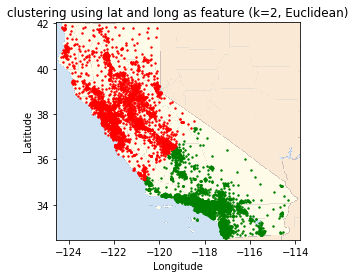

In [20]:
import matplotlib.image as mpimg
housing = pd.read_csv('housing.csv')
california_img=mpimg.imread('california.png')

data_2 = data[:,:2]
centroids = kmeans(data_2, 2)

classes = get_closest_centroid(data_2, centroids)
class_0 = data[classes==0]
class_1 = data[classes==1]


plt.scatter(housing.loc[classes==0,['longitude']], housing.loc[classes==0,['latitude']], c= 'g',s=2)
plt.scatter(housing.loc[classes==1,['longitude']], housing.loc[classes==1,['latitude']], c='r',s=2)

plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.title('clustering using lat and long as feature (k=2, Euclidean)')

plt.show()

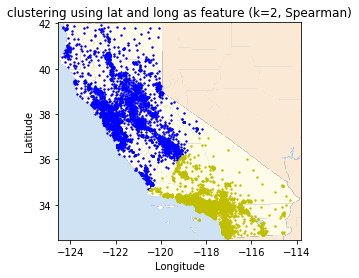

In [21]:
import matplotlib.image as mpimg
housing = pd.read_csv('housing.csv')
california_img=mpimg.imread('california.png')

data_2 = data[:,:2]
centroids = kmeans(data_2, 2)

classes = get_closest_centroid(data_2, centroids, 'spearman')
class_0 = data[classes==0]
class_1 = data[classes==1]


plt.scatter(housing.loc[classes==0,['longitude']], housing.loc[classes==0,['latitude']], c= 'b',s=2)
plt.scatter(housing.loc[classes==1,['longitude']], housing.loc[classes==1,['latitude']], c='y',s=2)

plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.title('clustering using lat and long as feature (k=2, Spearman)')

plt.show()

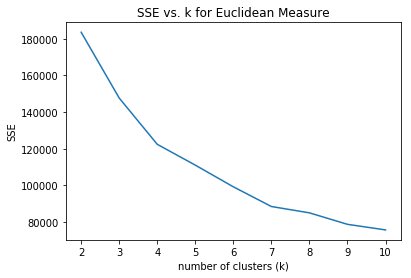

In [15]:
sse_all = {}
for k in range(2,11):
    centroids = kmeans(data, k)
    distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
    classes = get_closest_centroid(data, centroids)
    sse = 0
    for c in range(k):
        class_k = data[classes==c]
        centroid = centroids[c]
        sse += np.sum((class_k - centroid)**2)
    sse_all[k] = sse

lists = sorted(sse_all.items()) 

x, y = zip(*lists) 

plt.plot(x, y)
plt.xlabel('number of clusters (k)')
plt.ylabel('SSE')
plt.title('SSE vs. k for Euclidean Measure')
plt.show()

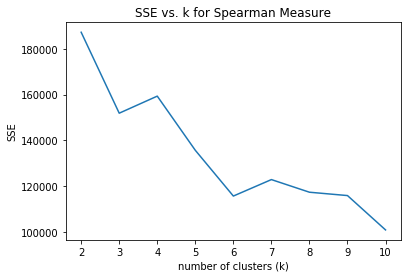

In [16]:
sse_all = {}
for k in range(2,11):
    centroids = kmeans(data, k, 'spearman')
    distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
    classes = get_closest_centroid(data, centroids)
    sse = 0
    for c in range(k):
        class_k = data[classes==c]
        centroid = centroids[c]
        sse += np.sum((class_k - centroid)**2)
    sse_all[k] = sse

lists = sorted(sse_all.items()) 

x, y = zip(*lists) 

plt.plot(x, y)
plt.xlabel('number of clusters (k)')
plt.ylabel('SSE')
plt.title('SSE vs. k for Spearman Measure')
plt.show()

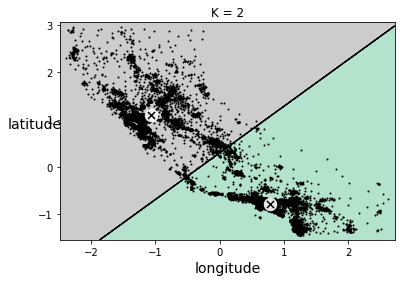

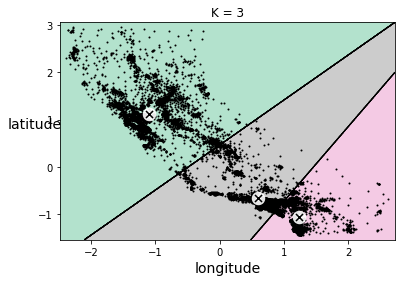

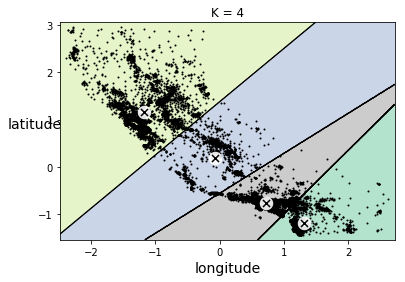

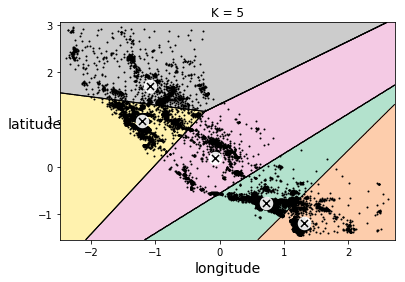

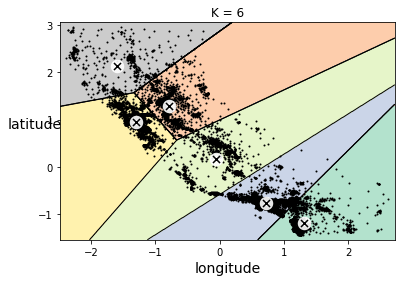

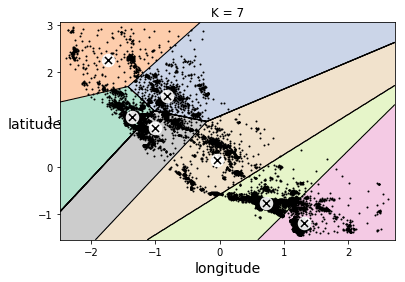

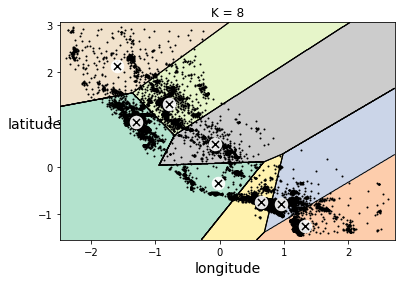

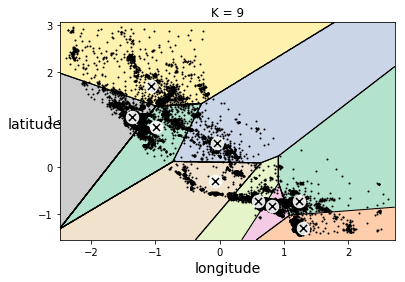

In [17]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    
    
    Z = get_closest_centroid(np.c_[xx.ravel(), yy.ravel()], clusterer)
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        #plot_centroids(clusterer.cluster_centers_)
        plot_centroids(clusterer)

    if show_xlabels:
        plt.xlabel("longitude", fontsize=14)
    else:
        plt.tick_params(labelbottom='off')
    if show_ylabels:
        plt.ylabel("latitude", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft='off')

data_2 = data[:,:2]
for k in range(2,10): 
    centroids = kmeans(data_2, k)
    plot_decision_boundaries(centroids, data_2)
    plt.title('K = '+str(k))
    plt.show()

In [ ]:
# We draw decision boundary for clusters with different values of k between 2 to 8. We can see that the decision boundary becomes more
# smooth for the k value of 6 to 7. Also, the Northern California has more clusters than the Southern region. Even while increasing the value of K,
# less number of clusters are visible in the northern region. 

#I think the clusters we found represents the scenario for geographical density based on the medican income of the population and cost of the houses.


- - -
## 4. WRITE ON THE INTUITION FOR THE CALIFORNIA HOUSING CRISIS (20 pts)

This question is a qualitative one, and is intended to let you experiment with a real world clustering task. Hopefully it gives you some intuition as for how the preset number of clusters affects the clustering results. Too few clusters may not reveal the information that is in the data. Too many clusters may hurt data analysis as well, as it may not generalize (and in this sense, it is equivalent to over fitting). Additionally, did you have any insight on which similarity measure (either Eucledean or Spearson Correlation) work better in this dataset.

Write at least one paragraph to demonstrate your intuition on the California Housing Crisis. You might also want to mention some possible solutions to solve it. You will receive credits based upon your insights and intuitions on this challenge. 



In [ ]:
# In this assignment, we have implemented K-means clustering algorithm with both Euclidean and Spearman similarity measure function.
# In section 3, we have plotted the Sum Squared Error (SSE) for different clusters from 2 to 10. From this curve, clearly the SSE value decreases with 
# the increaing number of clusters. We can see that between k= 6 to 7, we get the best clustering with smaller SSE.

# Among the two similarity measure, we get minimum SSE for the Euclidean function. Also, the smoothness of the SSE curve of Euclidean measure 
# is better than the Spearman similarity measure. The overall error value for Spearman is also quite higher than the Euclidean function. Therefore, 
# we can conclude that Euclidean similarity measure works better for our clustering of California Housing Crisis.

# To have better smooth clusters, we can also try Mean-shift Clustering (sliding window based), Density based clustering DBSCAN 
# and Expectation Maximization (EM) clustering. These clustering algorithm might help to have more accurate clusters in non-linear decision boundary.

- - - 
### NEED HELP?

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my lectures and/or the textbook
 * Talk to the TA, they are available and there to help you during [office hour](https://docs.google.com/document/d/15qB84xjaS-uRJmfKmmQuCz38bLMFaoqdbuRLoZEdOYI/edit#heading=h.72k1pvft525n)
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS6316 Assignment 3:...".

Best of luck and have fun!